In [207]:
# Creando directorio DANE en el Escritorio
import os
cwd = os.getcwd()

desired_directory = "/Users/Juan/OneDrive - Universidad de los andes/Escritorio"
os.chdir(desired_directory)

directory_name = "DANE"

try:
    os.mkdir(directory_name)
    print(f'Directorio {directory_name} creado')
except FileExistsError:
    print(f'Directorio {directory_name} ya existe')
except Exception as e:
    print(f'Error: {e}')

directory_location = desired_directory +"/" + directory_name
directory_location

Directorio DANE ya existe


'/Users/Juan/OneDrive - Universidad de los andes/Escritorio/DANE'

In [208]:
# Descarga de base de datos de IPC de la página del DANE

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.dane.gov.co/index.php/estadisticas-por-tema/precios-y-costos/indice-de-precios-al-consumidor-ipc/ipc-informacion-tecnica")
element = driver.find_element(By.XPATH, "//*[@title='Descargar Anexos Índice de Precios al Consumidor (IPC) octubre 2024']")
driver.execute_script("arguments[0].click();", element)

href_value = element.get_attribute("href")

driver.close()

In [209]:
# Moviendo los datos a la carpeta DANE en el Escritorio

from pathlib import Path
download_path = str(Path.home() / "Downloads")

version = href_value[-22:]

location = download_path + version
location = location.replace("\\", "/")

import shutil

try:
    shutil.move(location, directory_location)
except FileExistsError:
    print(f'Archivo {version} ya existe')
except Exception as e:
    print(f'Error: {e}')



Error: Destination path '/Users/Juan/OneDrive - Universidad de los andes/Escritorio/DANE\anex-IPC-oct2024.xlsx' already exists


In [210]:
# Cargando la base de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_name = directory_name + "/" + href_value[-21:]

df = pd.read_excel(file_name, sheet_name = "1")


In [211]:
# Limpiando la base de datos

df = df[7:18]
df = df.rename(columns = {'Unnamed: 0':'año', 'Unnamed: 1':'mensual',
                          'Unnamed: 2': 'año_corrido', 'Unnamed: 3': 'anual'})

df = df.iloc[1:]
df.columns

Index(['año', 'mensual', 'año_corrido', 'anual'], dtype='object')

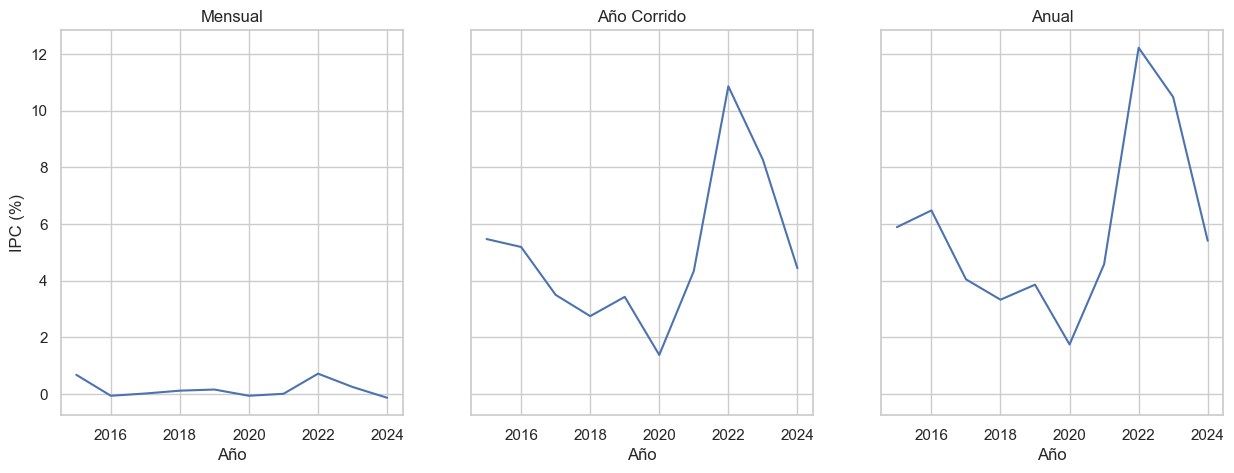

In [212]:
# Formato gráficos

sns.set_theme(style = "whitegrid")
fig, axs = plt.subplots(ncols = 3, figsize = (15, 5), sharex = True, sharey = True)

# Graficando inflación mensual
sns.lineplot(x = "año", y = "mensual", data = df, ax = axs[0])

# Graficando inflación año corrido
sns.lineplot(x = "año", y = "año_corrido", data = df, ax = axs[1])

# Graficando inflación anual
sns.lineplot(x = "año", y = "anual", data = df, ax = axs[2])

# Dando formato a los gráficos

for ax, title in zip(axs, ['Mensual', 'Año Corrido', 'Anual']):
    ax.set_title(title)

for ax, title in zip(axs, ['IPC (%)', 'IPC (%)', 'IPC (%)']):
    ax.set_ylabel(title)
for ax, title in zip(axs, ['Año', 'Año', 'Año']):
    ax.set_xlabel(title)



In [213]:
# Creador de informe

def CrearInformeInflacion():

    ultimo_dato_mensual = df['mensual'].iloc[-1]
    ultimo_dato_año_corrido = df['año_corrido'].iloc[-1]
    ultimo_dato_anual = df['anual'].iloc[-1]
    
    cambio_mensual = round((df['mensual'].iloc[-1] - df['mensual'].iloc[-2])/df['mensual'].iloc[-2], 2)
    cambio_año_corrido = round((df['año_corrido'].iloc[-1] - df['año_corrido'].iloc[-2])/df['año_corrido'].iloc[-2], 2)
    cambio_anual = round((df['anual'].iloc[-1] - df['anual'].iloc[-2])/df['anual'].iloc[-2], 2)

    print(f'El último dato de inflación mensual es {str(ultimo_dato_mensual) + "%"}. Presentó un cambio de {str(cambio_mensual) + "%"}')
    print(f'El último dato de inflación año corrido es {str(ultimo_dato_año_corrido) + "%"}. Presentó un cambio de {str(cambio_año_corrido) + "%"}')
    print(f'El último dato de inflación anual es {str(ultimo_dato_anual) + "%"}. Presentó un cambio de {str(cambio_anual) + "%"}')


In [214]:
CrearInformeInflacion()

El último dato de inflación mensual es -0.13%. Presentó un cambio de -1.52%
El último dato de inflación año corrido es 4.44%. Presentó un cambio de -0.46%
El último dato de inflación anual es 5.41%. Presentó un cambio de -0.48%
